In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error

In [419]:
df=pd.read_csv('banking.csv')

df.shape

(41188, 21)

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [421]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [422]:
unknown_counts = df.apply(lambda x: x[x == 'unknown'].count())
unknown_counts

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [423]:
df.fillna('unknown', inplace=True)

# Remove rows where any column contains 'unknown'
df = df[~df.isin(['unknown']).any(axis=1)]

# Optionally, reset the index
df.reset_index(drop=True, inplace=True)

In [424]:
unknown_counts = df.apply(lambda x: x[x == 'unknown'].count())
unknown_counts

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [425]:
df = df.sample(frac=1, random_state=2).reset_index(drop=True)



In [426]:
int_float_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['y'])
for column in int_float_cols:
 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

  
    IQR = Q3 - Q1

 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,technician,single,university.degree,no,yes,yes,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0
1,41,self-employed,married,basic.9y,no,yes,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
2,33,technician,married,basic.9y,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,21,services,single,high.school,no,yes,no,cellular,apr,thu,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.435,5099.1,0
4,53,blue-collar,divorced,basic.9y,no,no,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30481,35,admin.,married,university.degree,no,no,no,telephone,jun,fri,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
30482,38,blue-collar,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
30484,32,services,single,university.degree,no,no,yes,cellular,may,fri,...,3,999,0,nonexistent,-1.8,93.876,-40.0,0.699,5008.7,1
30485,55,management,married,university.degree,no,no,no,cellular,aug,mon,...,6,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0


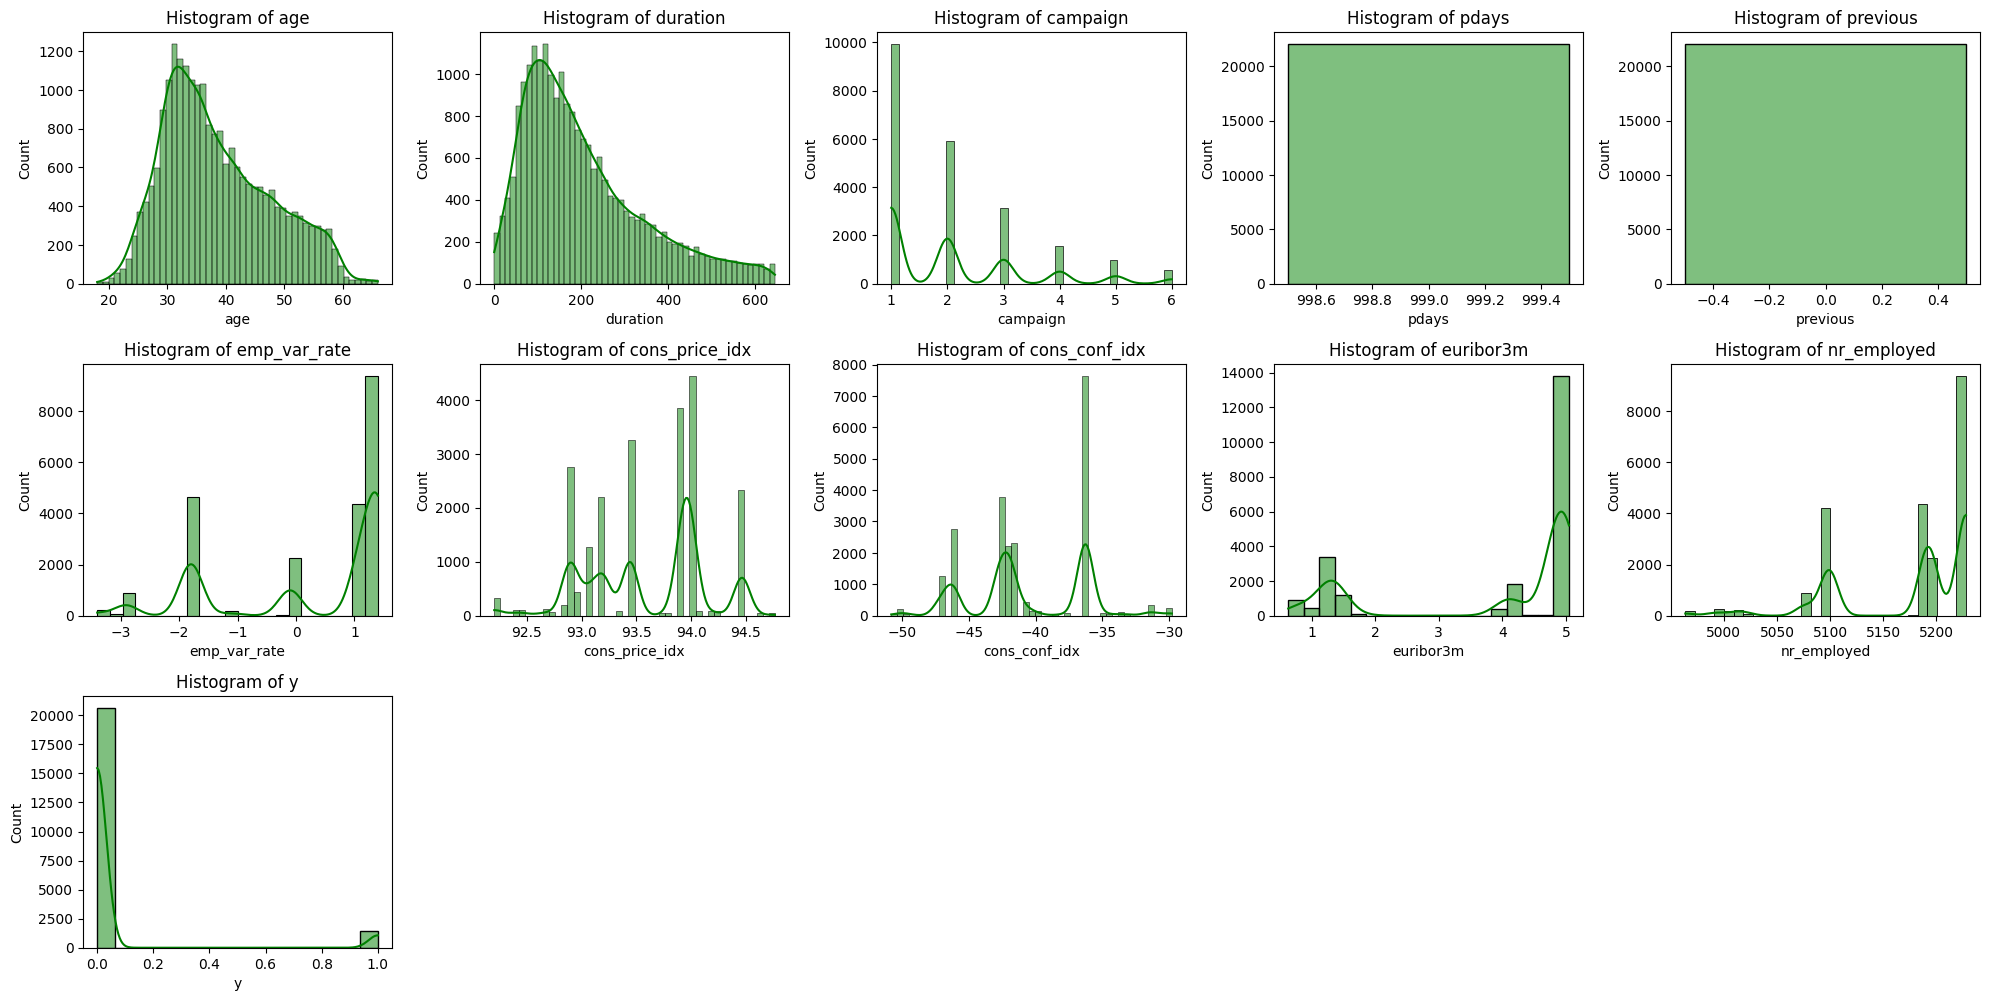

In [427]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 13))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[column], kde=True, color='green', label='Skewness: {:.2f}'.format(df[column].skew()))
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [428]:
# Convert binary categorical features
binary_features = ['default', 'housing', 'loan']
df[binary_features] = df[binary_features].apply(lambda x: x.map({'yes': 1, 'no': 0, 'unknown': -1}))

# One-hot encoding for other categorical features



In [429]:
df['loan']

0        1
1        0
2        0
3        0
4        0
        ..
30481    0
30482    0
30484    1
30485    0
30486    0
Name: loan, Length: 22030, dtype: int64

In [430]:
df['month'] = LabelEncoder().fit_transform(df['month'])
df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['job'] = LabelEncoder().fit_transform(df['job'])
df = pd.get_dummies(df, columns=['marital','contact','poutcome'], drop_first=True)
df.head(10)

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,...,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,marital_married,marital_single,contact_telephone
0,30,9,6,0,1,1,7,2,224,1,...,0,-0.1,93.200,-42.0,4.076,5195.8,0,False,True,False
1,41,6,2,0,1,0,6,4,514,2,...,0,1.1,93.994,-36.4,4.859,5191.0,0,True,False,True
2,33,9,2,0,0,0,6,4,68,1,...,0,1.1,93.994,-36.4,4.857,5191.0,0,True,False,True
3,21,7,3,0,1,0,0,2,374,3,...,0,-1.8,93.075,-47.1,1.435,5099.1,0,False,True,False
4,53,1,2,0,0,0,7,4,625,1,...,0,-0.1,93.200,-42.0,4.120,5195.8,0,False,False,False
5,59,5,6,0,1,1,1,4,526,1,...,0,-2.9,92.201,-31.4,0.884,5076.2,0,False,False,False
6,36,9,3,0,1,0,1,1,630,6,...,0,1.4,93.444,-36.1,4.965,5228.1,1,True,False,False
7,37,7,3,0,0,0,6,4,139,1,...,0,1.1,93.994,-36.4,4.858,5191.0,0,False,True,True
8,47,1,2,0,1,0,3,3,199,1,...,0,1.4,93.918,-42.7,4.962,5228.1,0,False,False,False
9,29,0,3,0,0,0,4,4,211,1,...,0,1.4,94.465,-41.8,4.864,5228.1,0,False,True,True


In [431]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.drop(['y'])
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

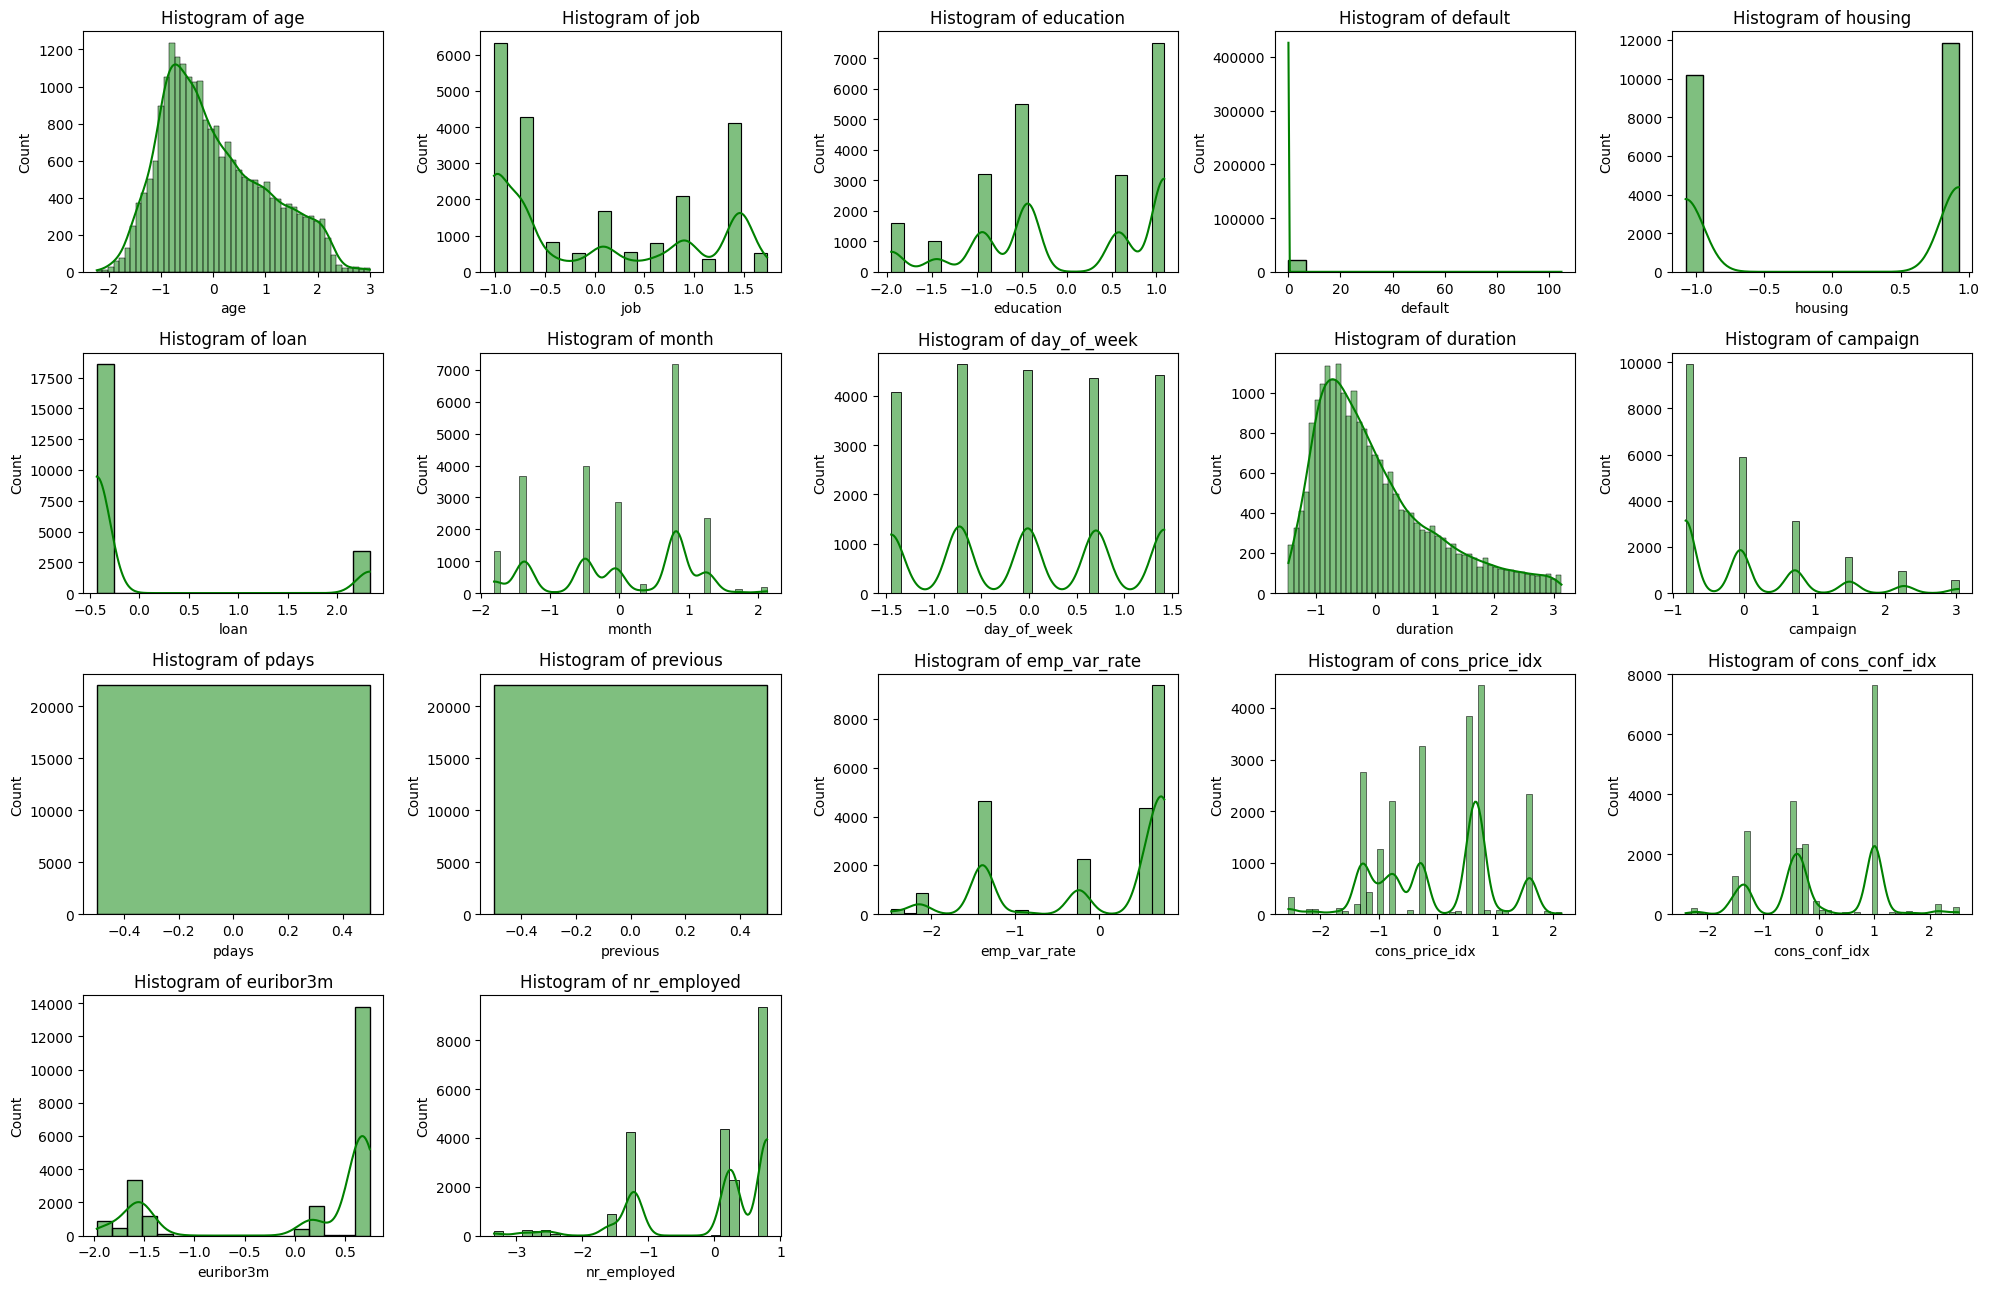

In [432]:
plt.figure(figsize=(20, 13))
for i, column in enumerate(df[numeric_features], 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[column], kde=True, color='green', label='Skewness: {:.2f}'.format(df[column].skew()))
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [433]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
30481    0
30482    0
30484    1
30485    0
30486    0
Name: y, Length: 22030, dtype: int64

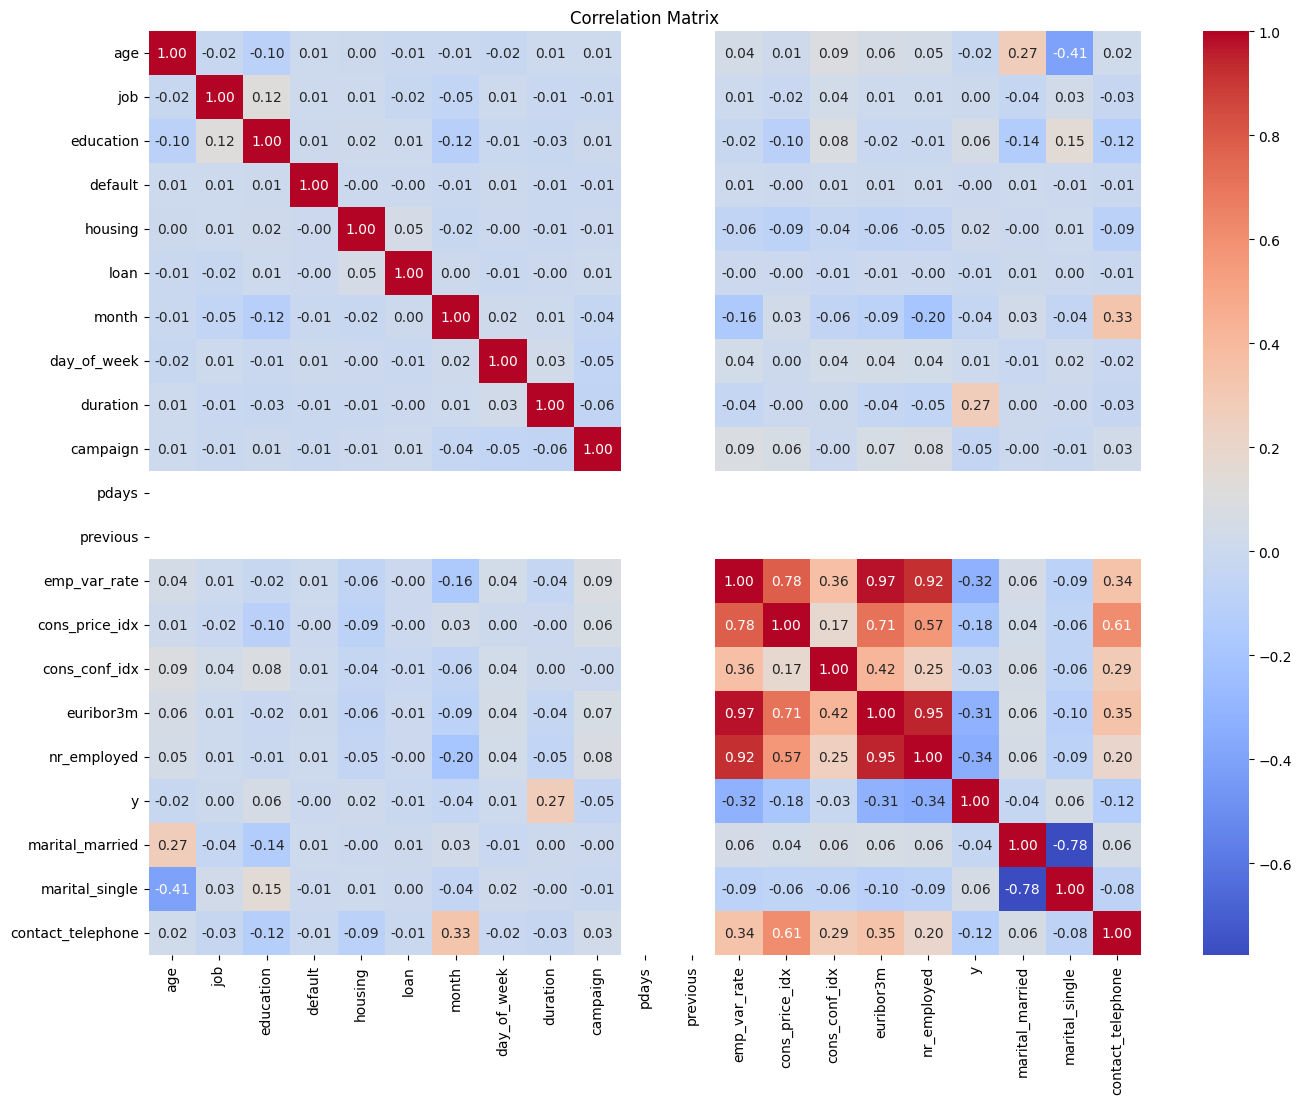

In [434]:
correlation_matrix = df.corr()
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
correlations_with_y = correlation_matrix['y'].sort_values(ascending=False)


In [435]:
from sklearn.ensemble import RandomForestClassifier

# Fit model
X = df.select_dtypes(include=['float64', 'int64','bool']).drop('y', axis=1)
model = RandomForestClassifier()
model.fit(X, df['y'])

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importances)


              Feature    Importance
0                 age  1.137118e-01
1                 job  5.678023e-02
2           education  4.479202e-02
3             default  4.668688e-09
4             housing  2.347021e-02
5                loan  1.642388e-02
6               month  3.300456e-02
7         day_of_week  5.172838e-02
8            duration  2.683609e-01
9            campaign  4.618745e-02
10              pdays  0.000000e+00
11           previous  0.000000e+00
12       emp_var_rate  3.132696e-02
13     cons_price_idx  3.503863e-02
14      cons_conf_idx  3.444338e-02
15          euribor3m  1.374231e-01
16        nr_employed  6.391320e-02
17    marital_married  1.446424e-02
18     marital_single  1.380274e-02
19  contact_telephone  1.512835e-02


In [436]:
threshold = 0.01
features_to_drop = feature_importances[feature_importances['Importance'] < threshold]['Feature'].tolist()
print("Features to Drop:", features_to_drop)

Features to Drop: ['default', 'pdays', 'previous']


In [437]:
df.drop(features_to_drop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22030 entries, 0 to 30486
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                22030 non-null  float64
 1   job                22030 non-null  float64
 2   education          22030 non-null  float64
 3   housing            22030 non-null  float64
 4   loan               22030 non-null  float64
 5   month              22030 non-null  float64
 6   day_of_week        22030 non-null  float64
 7   duration           22030 non-null  float64
 8   campaign           22030 non-null  float64
 9   emp_var_rate       22030 non-null  float64
 10  cons_price_idx     22030 non-null  float64
 11  cons_conf_idx      22030 non-null  float64
 12  euribor3m          22030 non-null  float64
 13  nr_employed        22030 non-null  float64
 14  y                  22030 non-null  int64  
 15  marital_married    22030 non-null  bool   
 16  marital_single     22030 no

In [438]:
df = df.sample(frac=1, random_state=2).reset_index(drop=True)

In [439]:
train_size = int(0.8 * len(df))  

# Split into training and testing sets
train_df = df[:train_size].reset_index(drop=True)
test_df = df[train_size:].reset_index(drop=True)

train_df

,age,job,education,housing,loan,month,day_of_week,duration,campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,marital_married,marital_single,contact_telephone
0,2.345342,-1.014875,-0.431627,0.927031,-0.429057,0.817921,-0.013579,2.874785,-0.824325,0.571398,0.726809,0.976296,0.633227,0.216833,0,False,True,True
1,-0.814233,1.461487,1.086049,-1.078713,-0.429057,2.130352,-0.013579,0.396941,-0.824325,-0.918679,1.101288,0.719165,-1.822417,-3.336538,0,True,False,False
2,0.711079,-0.739724,-0.431627,0.927031,-0.429057,1.255398,-0.729214,-0.307963,-0.051630,-2.476486,-1.730136,2.448954,-1.918620,-2.494292,1,True,False,False
3,0.275275,1.461487,0.580157,-1.078713,-0.429057,-0.494510,1.417692,-1.190872,-0.824325,0.774590,0.587978,-0.496362,0.696745,0.796561,0,False,False,True
4,1.909538,0.085730,1.086049,0.927031,-0.429057,0.817921,-0.013579,-0.621253,-0.051630,0.571398,0.726809,0.976296,0.633227,0.216833,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17619,0.493177,-1.014875,-0.431627,0.927031,2.330690,-0.494510,-0.729214,-0.158437,0.721065,0.774590,0.587978,-0.496362,0.696129,0.796561,0,True,False,False
17620,0.602128,-1.014875,1.086049,0.927031,-0.429057,0.817921,0.702057,-0.016033,-0.051630,-1.392794,-1.284415,-1.314505,-1.535041,-1.219204,0,True,False,False
17621,1.582686,-1.014875,1.086049,0.927031,-0.429057,-0.057033,1.417692,-0.663975,-0.824325,0.774590,1.587197,-0.285982,0.635693,0.796561,0,False,False,True
17622,-0.269479,1.461487,0.580157,-1.078713,-0.429057,-0.494510,0.702057,-0.955904,-0.051630,0.774590,0.587978,-0.496362,0.695512,0.796561,0,True,False,False


In [440]:
test_df['y']

0       0
1       0
2       0
3       0
4       0
       ..
4401    0
4402    0
4403    0
4404    0
4405    1
Name: y, Length: 4406, dtype: int64

In [441]:
y_train = train_df['y'].to_numpy()
y_test = test_df['y'].to_numpy()

In [442]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [443]:
# Drop the target variable from the features
X_train = train_df.drop(columns=['y'])
X_test = test_df.drop(columns=['y'])

In [444]:
# Include 'duration' for benchmark model
X_train_benchmark = X_train.copy()
X_test_benchmark = X_test.copy()

In [445]:
# Exclude 'duration' for realistic model
X_train_realistic = X_train.drop(columns=['duration'])
X_test_realistic = X_test.drop(columns=['duration'])

In [446]:
baseline_prediction = y_train.mean()

# Generate baseline predictions for the test set
baseline_model_test_predictions = [baseline_prediction] * len(y_test)

In [447]:
threshold = 0.5
baseline_model_test_predictions_binary = [1 if pred > threshold else 0 for pred in baseline_model_test_predictions]


In [448]:
# Calculate the baseline model error
accuracy = accuracy_score(y_test, baseline_model_test_predictions_binary)
print(f'Baseline model accuracy: {accuracy}')

Baseline model accuracy: 0.9369042215161144


In [449]:
mae = mean_absolute_error(y_test, baseline_model_test_predictions)
print(f'Baseline model mean absolute error: {mae}')

Baseline model mean absolute error: 0.11976640095244197


Explained variance by each component: [0.26995303 0.09463212]


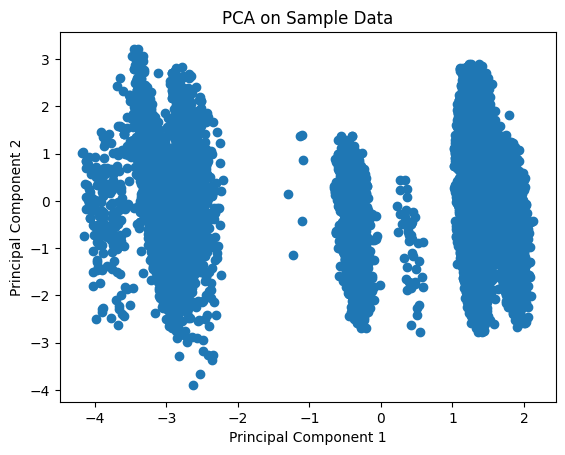

In [450]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume X is your feature matrix
pca = PCA(n_components=2)


principal_components = pca.fit_transform(X_train_realistic)

# Explained variance
print("Explained variance by each component:", pca.explained_variance_ratio_)

# Plot the first two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Sample Data')
plt.show()


In [451]:
svm_model = SVC(class_weight='balanced', C=np.float64(4.672004166832898), gamma=np.float64(0.7050034913555246), kernel='linear')
svm_model.fit(X_train_realistic, y_train)

SVC(C=np.float64(4.672004166832898), class_weight='balanced',
    gamma=np.float64(0.7050034913555246), kernel='linear')

In [452]:
y_pred_svm = svm_model.predict(X_test_realistic)
cm_svm = confusion_matrix(y_test, y_pred_svm)
desicion_score_svm = svm_model.decision_function(X_test_realistic)
desicion_score_svm

array([-1.00200121, -0.72750531,  0.46046558, ..., -0.99881806,
       -0.99999002,  1.05887009])

In [453]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      4128
           1       0.18      0.79      0.30       278

    accuracy                           0.76      4406
   macro avg       0.58      0.77      0.58      4406
weighted avg       0.93      0.76      0.82      4406

